# Análise das Stories

Notebook para o auxílio da análise das stories da Taís.


## Instalação

### Configurando jupyter

In [1]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

### Instalação do rasa

Intalando as configurações necessárias a partir do arquivo requirements.txt

In [2]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -r requirements.txt


Verificando versões:

In [3]:
import rasa_nlu
import rasa_core

print("rasa_nlu: {} rasa_core: {}".format(rasa_nlu.__version__, rasa_core.__version__))


rasa_nlu: 0.13.7 rasa_core: 0.9.0


### Outras ferramentas necessárias

Para algumas visualizações é necessário graphviz.

Instalando:

In [4]:
!{python} -m pip install graphviz;

# Análise e Avaliação das Stories

### Gerando imagens de fluxo

Gerando os arquivos de imagem para a visualização e avaliação do fluxo das stories. A célula abaixo gera uma imagem para cada arquivo de stories. 
Para ver as imagens geradas acessa a pasta `img` deste notebook.

In [5]:
from IPython.display import Image
from rasa_core.agent import Agent

from os import listdir
from os.path import isfile, join


agent = Agent('../../bot/domain.yml')

# Adds all stories files in a list
stories_files = [f for f in listdir("../../bot/data/stories") if isfile(join("../../bot/data/stories", f))]

# Generate the image for each file
for file in stories_files:
    agent.visualize('../../bot/data/stories/' + file,
                    './img/story_graph_' + file[:-3] + '.png',
                    max_history = 2)

print("Imagens salvas")

INFO:apscheduler.scheduler:Scheduler started
Processed Story Blocks: 100%|██████████| 15/15 [00:00<00:00, 323.07it/s, # trackers=1]


Imagens salvas


### Treinando as stories e gerando o gráfico

Na celula abaixo é feito o treinamento das stories e é gerado o gráfico da matriz de confusão para a avaliação das stories. Para melhor visualização, após rodar o código, abra o arquivo `story_eval.pdf` que será gerado e salvado na pasta `img` deste notebook.

Processed Story Blocks: 100%|██████████| 144/144 [00:03<00:00, 40.12it/s, # trackers=20]
Processed actions: 13166it [00:29, 450.73it/s, # examples=13048]
INFO:rasa_core.policies.memoization:Memorized 13048 unique action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 13166 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 5, 269)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                38656     
_________________________________________________________________
dense_2 (Dense)              (None, 135)               4455      
_________________________________________________________________
activation_2 (Activation)    (None, 135)               0         
Total params: 43,111
Trainable params: 43,111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/130
13166/13166 [==============================] - 4s 310us/step - loss: 3.0612 - acc: 0.3265
Epoch 2/130
13166/13166 [==============================] - 4s 300us/step - loss: 2.5324 - acc: 0.4965
Epoch 3/130
13166/13166 [==============================] - 4s 281u

13166/13166 [==============================] - 3s 232us/step - loss: 0.0656 - acc: 0.9812
Epoch 73/130
13166/13166 [==============================] - 3s 232us/step - loss: 0.0670 - acc: 0.9806
Epoch 74/130
13166/13166 [==============================] - 3s 231us/step - loss: 0.0618 - acc: 0.9822
Epoch 75/130
13166/13166 [==============================] - 3s 232us/step - loss: 0.0736 - acc: 0.9793
Epoch 76/130
13166/13166 [==============================] - 3s 233us/step - loss: 0.0577 - acc: 0.9824
Epoch 77/130
13166/13166 [==============================] - 3s 231us/step - loss: 0.0620 - acc: 0.9815
Epoch 78/130
13166/13166 [==============================] - 3s 239us/step - loss: 0.0644 - acc: 0.9807
Epoch 79/130
13166/13166 [==============================] - 4s 274us/step - loss: 0.0537 - acc: 0.9837
Epoch 80/130
13166/13166 [==============================] - 3s 263us/step - loss: 0.0670 - acc: 0.9810
Epoch 81/130
13166/13166 [==============================] - 4s 275us/step - loss: 0.06

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/home/gabibs/Documentos/lappis/tais/notebooks/stories/models/dialogue'
Processed Story Blocks: 100%|██████████| 144/144 [00:00<00:00, 232837.23it/s]
INFO:rasa_core.evaluate:Evaluating 139 stories
Progress:
100%|██████████| 139/139 [00:02<00:00, 65.64it/s]
INFO:rasa_nlu.evaluate:F1-Score:  0.972972972972973
INFO:rasa_nlu.evaluate:Precision: 0.972972972972973
INFO:rasa_nlu.evaluate:Accuracy:  0.972972972972973
INFO:rasa_nlu.evaluate:Classification report: 
                                                              precision    recall  f1-score   support

                                                        None       0.00      0.00      0.00         4
                                               action_listen       0.98      0.98      0.98       244
                                  utter_cadastro_salic_video       1.00      1.00      1.00         4
                      

INFO:rasa_nlu.evaluate:Confusion matrix, without normalization: 
[[  0   0   0 ...   0   0   0]
 [  2 239   0 ...   0   0   0]
 [  0   0   4 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   2]]


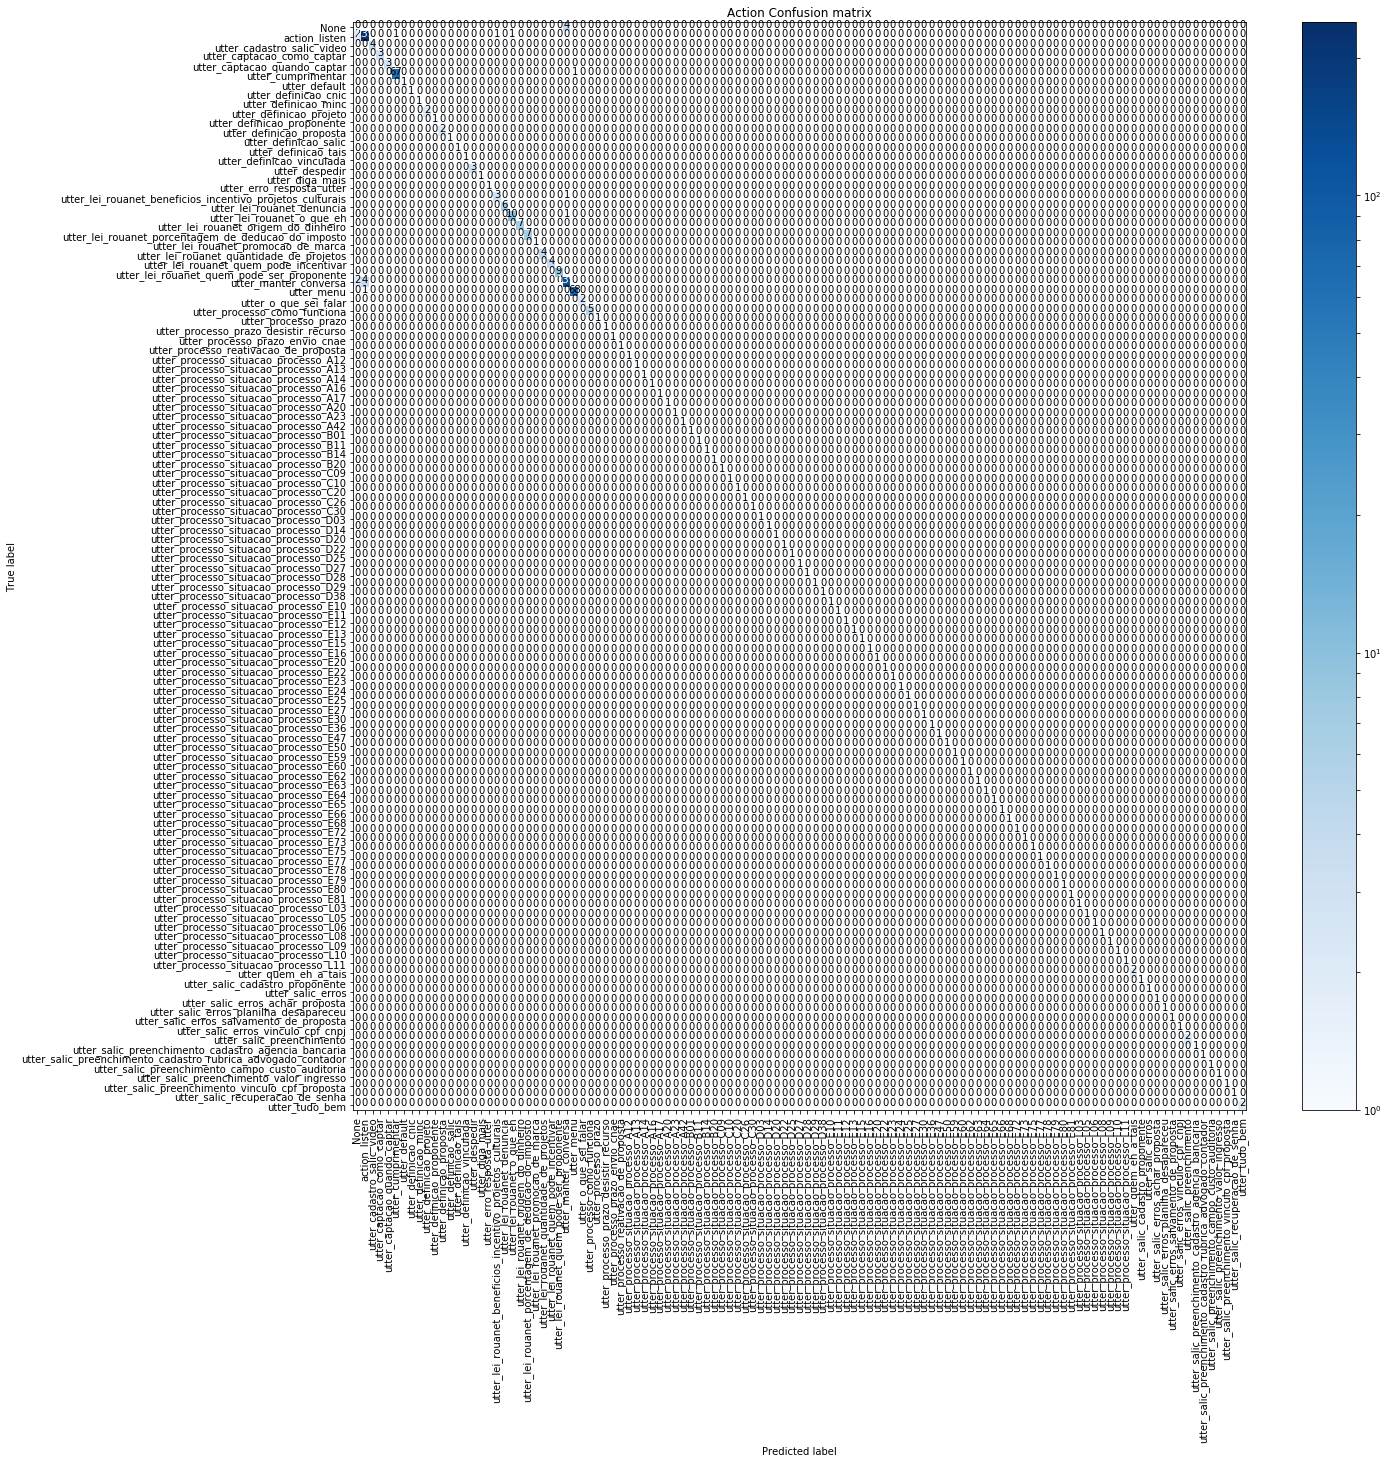

In [9]:
from rasa_core.evaluate import run_story_evaluation
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent


## Treinando modelo de diálogo
agent = Agent('../../bot/domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

# loading our neatly defined training dialogues
training_data = agent.load_data('../../bot/data/stories')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=130
)

## salvando em models/dialogue
agent.persist('models/dialogue')

run_story_evaluation("../../bot/data/stories", "models/dialogue", 
                     nlu_model_path=None, 
                     max_stories=None, 
                     out_file_plot="img/story_eval.pdf")
